# CS-E4895: Gaussian Processes

# Assignment #2: The Squared Exponential Kernel and Gaussian Process Model

### Learning objectives

After completing this lab exercise, you should be able to:

- Implement the squared exponential kernel and explain the interpretation of each parameter
- Generate samples from a Gaussian process prior
- Compute the posterior & predictive distributions for a Gaussian process model with Gaussian likelihood

**Note:** All exercises must be solved using numpy only.

This assignment consists of 3 smaller tasks and each task is worth 2 points.

## Enter your student number here

**STUDENT_NUMBER** = 102179473

## Warnings:

- Don’t copy and paste cells within a notebook. This will mess up the tracking metadata and prevent autograding from working.
- Only add new cells using the '+' button in the upper toolbar and do not split cells.
- Be cautious about things such as copying the whole notebook to Colab to work on it. This has sometimes resulted in removing all notebook metadata, making autograding impossible.

In [1]:
%matplotlib inline
import os
import numpy as np
import pylab as plt
import seaborn as snb
snb.set(font_scale=1.5)

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

In [33]:
automatic_grading = True  # Set this to True after completing the notebook and before submitting.

#### Do not move or delete the below block. It is used for automatic grading.

### Task 1: The squared exponential kernel (2 points)

The squared exponential covariance function is given by

\begin{align}
    k(\mathbf{x}_n, \mathbf{x}_m) = \alpha \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_m\|^2_ 2}{2\ell^2}\right),
\end{align}

where $\alpha > 0$ and $\ell > 0$ are hyperparameters of the kernel. This specific covariance function is perhaps the most common covariance function used in statistics and machine learning. It is also known as the radial basis function kernel, the gaussian kernel, or the exponeniated quadratic kernel. 

Below you are given a vector $\mathbf{X}^p \in \mathbb{R}^{N \times 1}$ of $N = 50$ points on the real line. The points are sorted and equidistantly distributed in the interval $\left[-3, 9\right]$. 

In [7]:
# create an Nx1 vector of equidistant points in [-3, 3]
N = 50
Xp = np.linspace(-3, 9, N)[:, None]

**Task 1a**: Complete the implementation of the squared exponential kernel function below. (Hint: the code only needs to work with $D=1$).

In [8]:
def create_se_kernel(X1, X2, alpha=1, scale=1):
    """ returns the NxM kernel matrix between the two sets of input X1 and X2 
    
    arguments:
    X1    -- NxD matrix
    X2    -- MxD matrix
    alpha -- scalar 
    scale -- scalar
    
    returns NxM matrix    
    """
    prematrix = np.ones((X1.shape[0], X2.shape[0]))
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)
    
    # YOUR CODE HERE
    return prematrix


Let's test the above function:

In [9]:
X1 = np.asarray([[0.477], [0.986], [0.101]])
X2 = np.asarray([[0.872], [0.210]])

assert create_se_kernel(X1, X2).shape == (3,2)
np.testing.assert_allclose(create_se_kernel(X1, X2), np.asarray([[0.92495, 0.96498], [0.99352, 0.74001], [0.74288, 0.99408]]), atol=1e-3)

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


#### Do not move or delete the below block. It is used for automatic grading.

**Task 1b**: Use the kernel function to compute the $N\times N$ kernel matrix for the points $\mathbf{X}^p$ with $\alpha=1$ and $\ell=1$. These points will be used for predictions later and hence, the superscript 'p'. Visualize the kernel function as an image and give an interpretation of the structure of the kernel (Hint: Use the 'imshow' function). Then, answer the multiple choice question below.

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


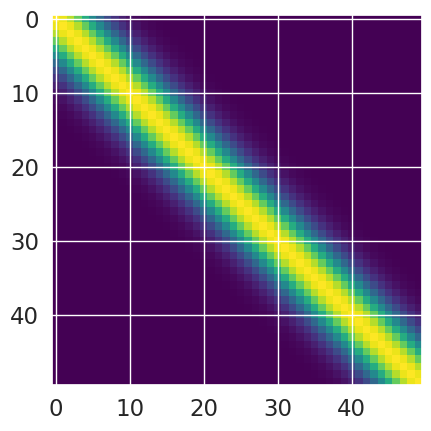

In [10]:
# YOUR CODE HERE
kernelfunction = create_se_kernel(Xp, Xp, alpha=1, scale=1)
plt.imshow(kernelfunction, cmap='viridis')

**What does the kernel function visualization look like?**

**1)** It shows a **diagonal** band, which indicates **higher** values along the diagonal.

**2)** It shows a **diagonal** band, which indicates **lower** values along the diagonal.

**3)** It shows a **horizontal** band, which indicates **higher** values along the horizontal.

**4)** It shows a **horizontal** band, which indicates **lower** values along the horizontal.

Choose one answer and type it in the cell below.

In [11]:
a_1b = 1  # TASK: Replace None with your answer (1, 2, 3, 4)

In [12]:
assert a_1b in [1, 2, 3, 4]

#### Do not move or delete the below block. It is used for automatic grading.

**Task 1c**: Visualize the kernel function for a few other values for the $\alpha$ (alpha) parameter and answer the multiple choice question below.

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


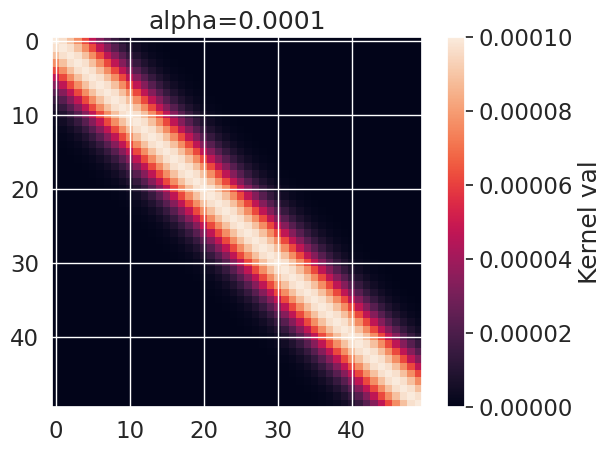

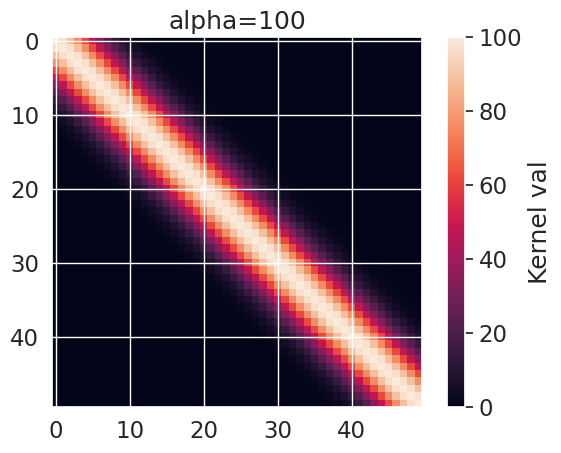

In [24]:
# YOUR CODE HERE
pruebas = [0.0001, 100]
for alpha in pruebas:
    kernelfunction = create_se_kernel(Xp, Xp, alpha=alpha, scale=1)
    plt.imshow(kernelfunction)
    plt.title(f'alpha={alpha}')
    plt.colorbar(label = "Kernel val")
    plt.show()

How does changing the $\alpha$ (alpha) parameter affect the kernel function's structure?

**1)** Increasing $\alpha$ decreases the width of the band of higher values.

**2)** Increasing $\alpha$ increases the width of the band of higher values.

**3)** Increasing $\alpha$ has no effect on the width of the band, but increases its intensity.

**4)** Increasing $\alpha$ has no effect on the width of the band, but decreases its intensity.

Choose one answer and type it in the cell below.

In [ ]:
a_1c = 3  # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_1c in [1, 2, 3, 4]

#### Do not move or delete the below block. It is used for automatic grading.

**Task 1d:** Visualize the kernel function for a few other values for the $\ell$ (scale) parameter and answer the multiple choice question below.

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


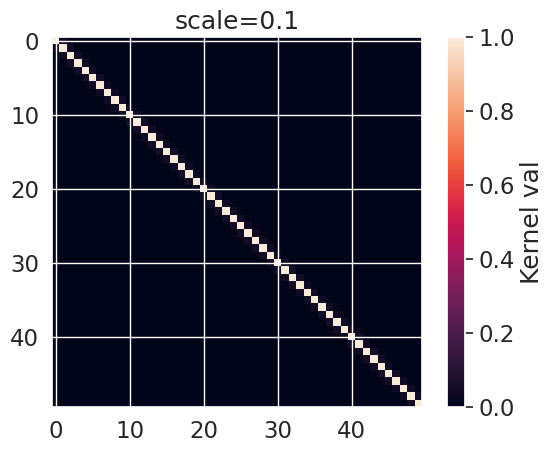

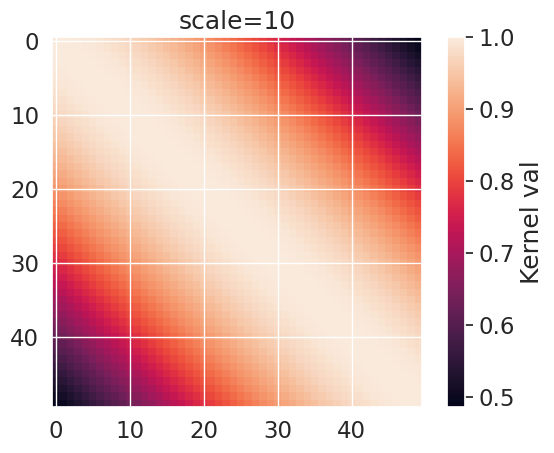

In [25]:
# YOUR CODE HERE
pruebas = [0.1, 10]
for scale in pruebas:
    kernelfunction = create_se_kernel(Xp, Xp, alpha=1, scale=scale)
    plt.imshow(kernelfunction)
    plt.title(f'scale={scale}')
    plt.colorbar(label = "Kernel val")
    plt.show()

How does changing the $\ell$ (scale) parameter affect the kernel function's structure?

**1)** Increasing $\ell$ decreases the width of the band of higher values.

**2)** Increasing $\ell$ increases the width of the band of higher values.

**3)** Increasing $\ell$ has no effect on the width of the band, but increases its intensity.

**4)** Increasing $\ell$ has no effect on the width of the band, but decreases its intensity.

Choose one answer and type it in the cell below.

In [ ]:
a_1d = 2  # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_1d in [1, 2, 3, 4]

#### Do not move or delete the below block. It is used for automatic grading.

---

### Task 2: Sampling from a Gaussian process (1.5 points)

We will consider a zero-mean Gaussian process prior for functions of the form $f: \mathbb{R} \rightarrow \mathbb{R}$ using the squared exponential kernel from task 1). That is,

\begin{align}
f(x) \sim \mathcal{GP}\left(0 \, , \, k\left(x, x'\right)\right).
\end{align}

Let $f_n = f(x_n) \in \mathbb{R}$ be the value of the function $f$ evaluated at a point $x_n \in \mathbb{R}$. Furthermore, let $\mathbf{f} = \left[f_1, f_2, \dots, f_N\right] \in \mathbb{R}^{N \times 1}$ be the vector of function values for each of the points of $\mathbf{X}^p$ from task 1. 

The Gaussian process prior for $\mathbf{f}$ becomes

\begin{align}
\mathbf{f} \sim \mathcal{N}\left(\mathbf{0}, \mathbf{K}\right),
\end{align}

where $\mathbf{K}$ is the kernel matrix you generated previously.

**Task 2a**: Complete the implementation of the sampling function given below. Hint: You can re-use the code from first exercise.


In [26]:
def generate_samples(mean, K, M):
    """ returns M samples from a zero-mean Gaussian process with kernel matrix K
    
    arguments:
    mean -- Nx1 mean vector
    K    -- NxN kernel matrix
    M    -- number of samples (scalar)
    
    returns NxM matrix
    """
    
    # YOUR CODE HERE
    mu = mean
    Sigma = K
    jitter = 1e-8
    D = len(mu)
    L = np.linalg.cholesky(Sigma + jitter*np.identity(D))
    zs = np.random.normal(0, 1, size=(D, M))
    fs = mu + np.dot(L, zs)
    return fs
    


Let's test the above function

In [27]:
samples = generate_samples(np.zeros((5, 1)), np.eye(5), 2)
assert samples.shape == (5, 2)

#### Do not move or delete the below block. It is used for automatic grading.

**Task 2b**: Generate $M = 10$ samples from the Gaussian process prior $\mathbf{f} \sim \mathcal{N}\left(\mathbf{0}, \mathbf{K}\right)$ using the function you implemented. For kernel matrix $\mathbf{K}$, use the kernel matrix for the points $\mathbf{X}^p$ with $\alpha=1$ and $\ell=1$ which you computed in *Task 1b*. Plot the samples, and answer the multiple choice question below.

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


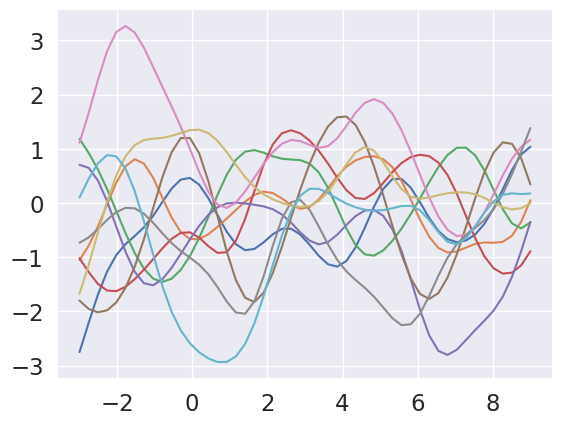

In [28]:
# YOUR CODE HERE
mean = np.zeros((N, 1))
K = create_se_kernel(Xp, Xp, alpha=1, scale=1)
samples = generate_samples(mean, K, 10)
plt.plot(Xp, samples)

What do the generated samples look like?

**1)** Straight horizontal lines, each with a different slope and different intercept at $x=0$.

**2)** Continuous curves that are roughly centered around $f(x)=0$.

**3)** Continuous curves that are roughly centered around $f(x)=10$.

**4)** Straight horizontal lines, each with a different slope but the same intercept at $x=0$.

Choose one answer and type it in the cell below.

In [ ]:
a_2b = 2  # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_2b in [1, 2, 3, 4]

#### Do not move or delete the below block. It is used for automatic grading.

**Task 2c**: Change the parameter $\alpha$ (alpha) and observe how it affects the generated samples. Plot them, and answer the multiple choice question below.

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


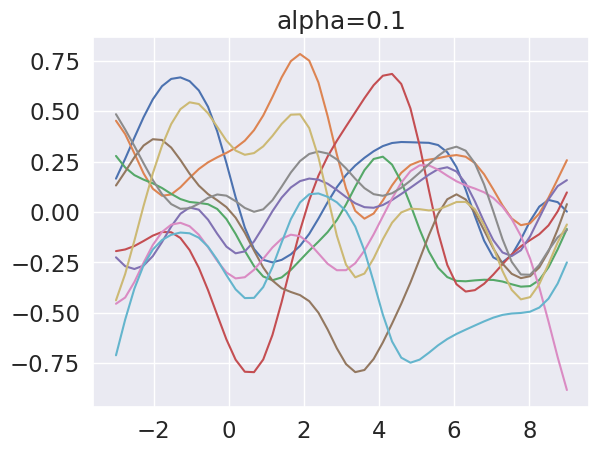

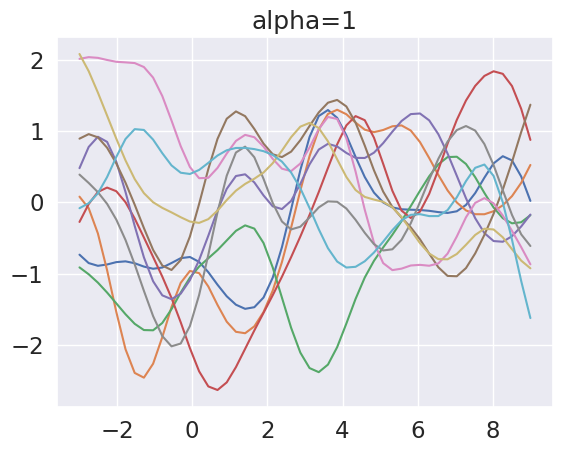

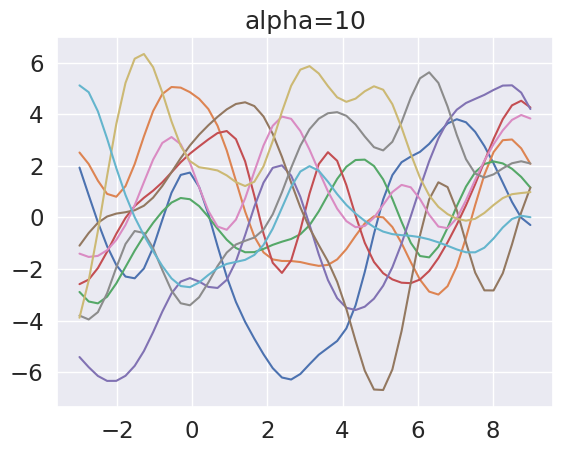

In [30]:
# YOUR CODE HERE
pruebas = [0.1, 1, 10]
for alpha in pruebas:
    K = create_se_kernel(Xp, Xp, alpha=alpha, scale=1)
    samples = generate_samples(mean, K, 10)
    plt.plot(Xp, samples)
    plt.title(f'alpha={alpha}')
    plt.show()

What is the effect of changing the $\alpha$ (alpha) parameter on the generated samples?

**1)** Increasing the $\alpha$ parameter results in the samples having a larger range of values.

**2)** Decreasing the $\alpha$ parameter results in the samples looking more smooth.

**3)** Increasing the $\alpha$ parameter results in the samples having a smaller range of values.

**4)** Decreasing the $\alpha$ parameter results in the samples looking less smooth.

Choose one answer and type it in the cell below.

In [ ]:
a_2c1 = 1  # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_2c1 in [1, 2, 3, 4]

### Do not move or delete the below block. It is used for automatic grading.

**Task 2d**: Change the parameter $\ell$ (scale) and observe how it affects the generated samples. Plot them, and answer the multiple choice question below.

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


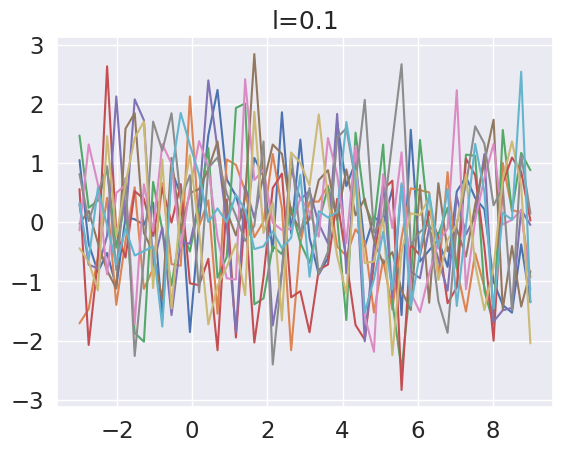

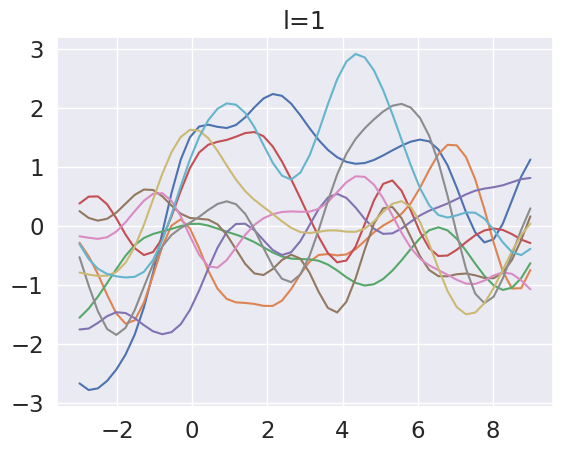

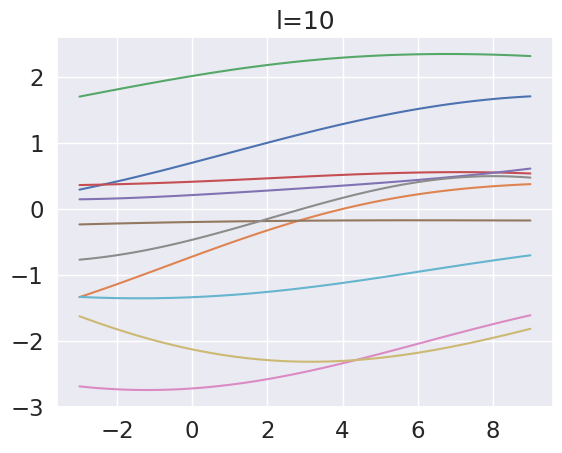

In [31]:
# YOUR CODE HERE
pruebas = [0.1, 1, 10]
for l in pruebas:
    K = create_se_kernel(Xp, Xp, alpha=1, scale=l)
    samples = generate_samples(mean, K, 10)
    plt.plot(Xp, samples)
    plt.title(f'l={l}')
    plt.show()

What is the effect of changing the $\ell$ (scale) parameter on the generated samples?

**1)** Increasing the $\ell$ parameter results in the samples having a larger range of values.

**2)** Decreasing the $\ell$ parameter results in the samples looking more smooth.

**3)** Increasing the $\ell$ parameter results in the samples having a smaller range of values.

**4)** Decreasing the $\ell$ parameter results in the samples looking less smooth.

Choose one answer and type it in the cell below.

In [ ]:
a_2d = 4  # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_2d in [1,2,3,4]

#### Do not move or delete the below block. It is used for automatic grading.

---

### Task 3: The analytical posterior distribution (2.5 points)

The goal of this task is complete the implementation of the function below for computing the analytical posterior distribution for a Gaussian process model with Gaussian likelihood, respectively, using the squared exponential kernel.

The joint model for the training data is as follows:
\begin{align}
p(\mathbf{y}, \mathbf{f}) = \mathcal{N}\left(\mathbf{y}|\mathbf{f}, \sigma^2 \mathbf{I}\right)\mathcal{N}\left(\mathbf{f} | \mathbf{0}, \mathbf{K}\right)
\end{align}





Below you are given a simple toy data set $\mathcal{D} = \left\lbrace x_n, y_n \right\rbrace_{n=1}^N$ for $N = 50$ as visualized below

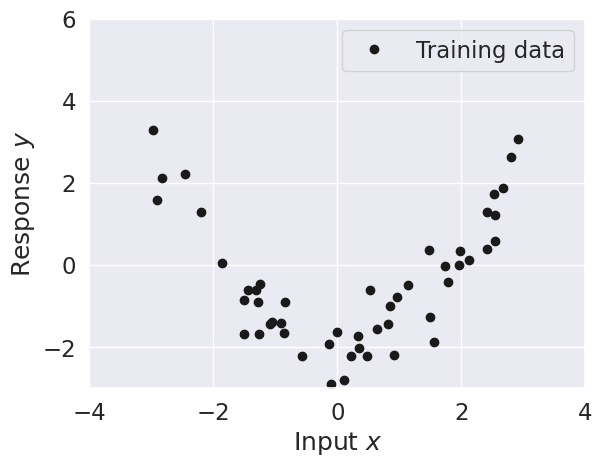

In [34]:
# load data
data = np.load('assignment2_data.npz')
N = data['N']
X = data['X']
y = data['y']
Xp = np.linspace(-3, 9, N)[:, None]

def plot_data():
    plt.plot(X, y, 'k.', markersize=12, label='Training data')
    plt.grid(True)
    plt.xlim((-4, 4))
    plt.ylim((-3, 6))
    plt.xlabel('Input $x$')
    plt.ylabel('Response $y$')
    plt.legend();

if not automatic_grading:
    plot_data()


**Task 3a**: Complete the implementation of the function <tt>posterior</tt> that computes the posterior

\begin{align*}
p(f_* | X,y,X^p) = \mathcal{N} \left(f_* \big| K_{f_* f} (K_{ff} + \sigma^2)^{-1} y, K_{f_* f_*} - K_{f_* f} (K_{ff} + \sigma^2)^{-1} K_{f_* f}^T \right)
\end{align*}


In [35]:
def posterior(Xp, X, y, alpha, scale, sigma2):
    """ returns the posterior distribution of f evaluated at each of the points in Xp conditioned on (X, y)
        using the squared exponential kernel.
    
    Arguments:
    Xp    -- PxD prediction points
    X     -- NxD input points
    y     -- Nx1 observed values 
    alpha -- hyperparameter
    scale -- hyperparameter
    sigma2 -- noise variance
    
    returns Px1 mean vector and PxP covariance matrix
    """

    # YOUR CODE HERE
    ## first lets calculate the kernel matrix of ff
    kernelmatrixff = create_se_kernel(X, X, alpha, scale)
    kernelmatrixff += sigma2*np.identity(X.shape[0])
    kernelmatrixff_inv = np.linalg.inv(kernelmatrixff)
    kernelmatrixfpf = create_se_kernel(Xp, X, alpha, scale)
    mu = kernelmatrixfpf @ kernelmatrixff_inv @ y
    ## now lets calculate the covariance matrix
    kernelmatrixfpfp = create_se_kernel(Xp, Xp, alpha, scale)
    Sigma = kernelmatrixfpfp - kernelmatrixfpf @ kernelmatrixff_inv @ kernelmatrixfpf.T
    
    return mu, Sigma

Let's test the above function:

In [36]:
# Make some dummy data
X_test = np.array([3.06, 1.09, 0.01, -0.59, -1.53, -2.41]).reshape((6, 1))
y_test = np.array([2.20, 2.01, 1.95, 2.40, 2.50, 2.20]).reshape((6, 1))
Xp_test = np.asarray([2.45, 0.00, -0.69]).reshape((3, 1))

# Call the posterior function implementation
mu_test, Sigma_test = posterior(Xp_test, X_test, y_test, alpha=1.0, scale=1.0, sigma2=1.0)

# Test the results
assert mu_test.shape == (3, 1)
assert Sigma_test.shape == (3, 3)
np.testing.assert_allclose(mu_test, np.asarray([[1.18489], [1.59151], [1.76300]]), rtol=1e-3, atol=1e-3)
np.testing.assert_allclose(Sigma_test, 
                                     np.asarray([[ 0.59695, -0.02277, -0.00558],
                                                [-0.02277,  0.35115,  0.22146],
                                                [-0.00558,  0.22146,  0.3450]]), rtol=1e-3, atol=1e-3)

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


#### Do not move or delete the below block. It is used for automatic grading.

**Task 3b**: Compute the prior & posterior of $f(\mathbf{X}_p)$ with $\sigma^2 = \frac{1}{2}$, $\alpha=1$, and $\ell$=1, where $\mathbf{X}_p$ is the vector from *Task 1*.


In [37]:
sigma2 = 0.5
alpha = 1
scale = 1

# prior mean and covariance
mu_prior, Sigma_prior = np.zeros((N, 1)), create_se_kernel(Xp, Xp, alpha, scale)

# posterior mean and covariance
mu_post, Sigma_post = posterior(Xp, X, y, alpha, scale, sigma2)

# YOUR CODE HERE
#raise NotImplementedError()

/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


Let's test the above:

In [38]:
assert mu_prior.shape == (50, 1)
assert Sigma_prior.shape == (50, 50)
assert mu_post.shape == (50, 1)
assert Sigma_post.shape == (50, 50)

#### Do not move or delete the below block. It is used for automatic grading.

**Task 3c**: If the functions above have been implemented correctly, then the following two plots below will show the training data superimposed with prior and posterior, respectively. Answer the two multiple choice questions below.

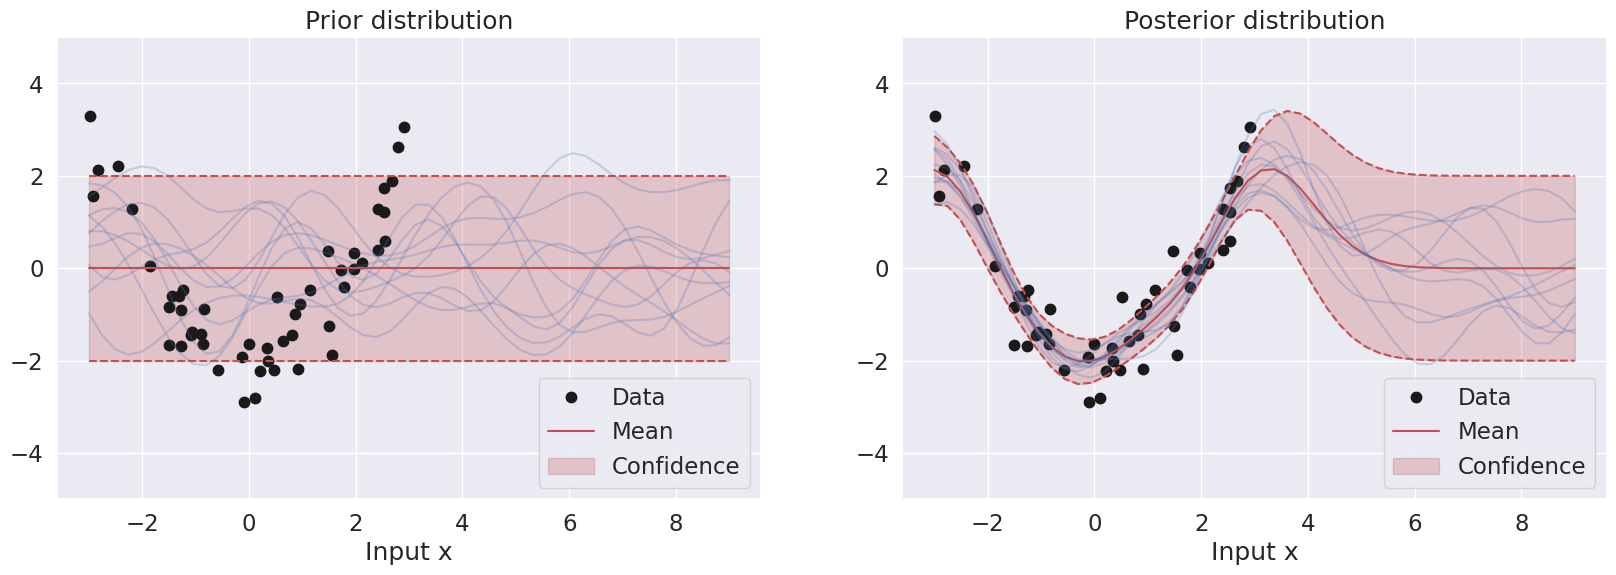

In [39]:
def plot_with_uncertainty(Xp, mu, Sigma, color='r', color_samples='b', title="", num_samples=0):
    
    mean, std = mu.ravel(), np.sqrt(np.diag(Sigma))

    
    # plot distribution
    plt.plot(Xp, mean, color=color, label='Mean')
    plt.plot(Xp, mean + 2*std, color=color, linestyle='--')
    plt.plot(Xp, mean - 2*std, color=color, linestyle='--')
    plt.fill_between(Xp.ravel(), mean - 2*std, mean + 2*std, color=color, alpha=0.25, label='Confidence')
    
    # generate samples
    if num_samples > 0:
        fs = generate_samples(mu, Sigma, 10)
        plt.plot(Xp, fs, color=color_samples, alpha=.25)
    
    plt.title(title)
    
def plot_data():
    plt.plot(X, y, 'k.', markersize=15, label='Data')
    plt.xlabel('Input x')
    plt.ylim((-5, 5))
    plt.grid(True)


def plot_data_with_uncertainty():
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plot_data()
    plot_with_uncertainty(Xp, mu_prior, Sigma_prior, title='Prior distribution', num_samples=10)
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plot_data()
    plot_with_uncertainty(Xp, mu_post, Sigma_post, title='Posterior distribution', num_samples=10)
    plt.legend(loc='lower right')

if not automatic_grading:
    plot_data_with_uncertainty()

What is the difference between the prior and the posterior distributions in regions **close to** the data points $(-3 < x < 3)$?

**1)** The prior distribution plot shows a **constant mean line** with a **wide confidence interval**, and and the posterior distribution plot shows a shows a **constant mean line** with a **wide confidence interval**.

**2)** The prior distribution plot shows a **mean curve** that follows the data with a **narrow confidence interval**, and the posterior distribution plot shows a **constant mean line** with a **wide confidence interval**.

**3)** The prior distribution plot shows a **constant mean line** with a **wide confidence interval**, and the posterior distribution plot shows a **mean curve** that follows the data with a **narrow confidence interval**.

**4)** The prior distribution plot shows a **mean curve** that follows the data with a **narrow confidence interval**, and the posterior distribution plot shows a **mean curve** that follows the data with a **narrow confidence interval**.

Choose one answer and type it in the cell below.

In [ ]:
a_3c1 = 3  # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_3c1 in [1, 2, 3, 4]

#### Do not move or delete the below block. It is used for automatic grading.

What is the difference between the prior and the posterior distributions in regions **far away** from the data points $(x > 6)$?

**1)** The prior distribution plot shows a **constant mean line** with a **wide confidence interval**, and also the posterior distribution plot shows a shows a **constant mean line** with a **wide confidence interval**.

**2)** The prior distribution plot shows a **mean curve** that follows the data with a **narrow confidence interval**, whilst the posterior distribution plot shows a **constant mean line** with a **wide confidence interval**.

**3)** The prior distribution plot shows a shows a **constant mean line** with a **wide confidence interval**, whilst the posterior distribution plot shows a **mean curve** that follows the data with a **narrow confidence interval**.

**4)** The prior distribution plot shows a **mean curve** that follows the data with a **narrow confidence interval**, and also the posterior distribution plot shows a **mean curve** that follows the data with a **narrow confidence interval**.

Choose one answer and type it in the cell below.

In [ ]:
a_3c2 = 1  # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_3c2 in [1, 2, 3, 4] 

#### Do not move or delete the below block. It is used for automatic grading.

**Task 3d**: Replicate the two figures above for the following three different values of the scale parameter: $\ell \in \left\lbrace 0.1, 1., 10 \right\rbrace$ and for $\sigma^2 = \frac{1}{2}$ and $\alpha=1$. Answer the multiple choice question below.


/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


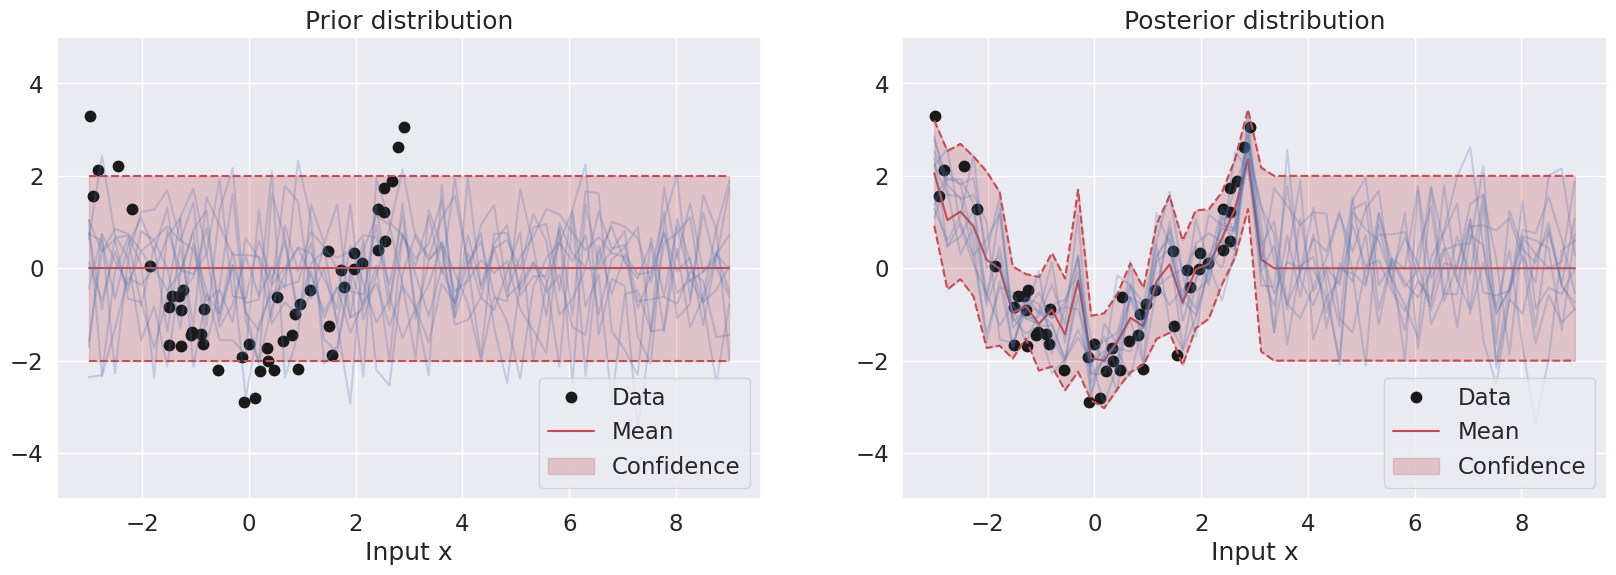

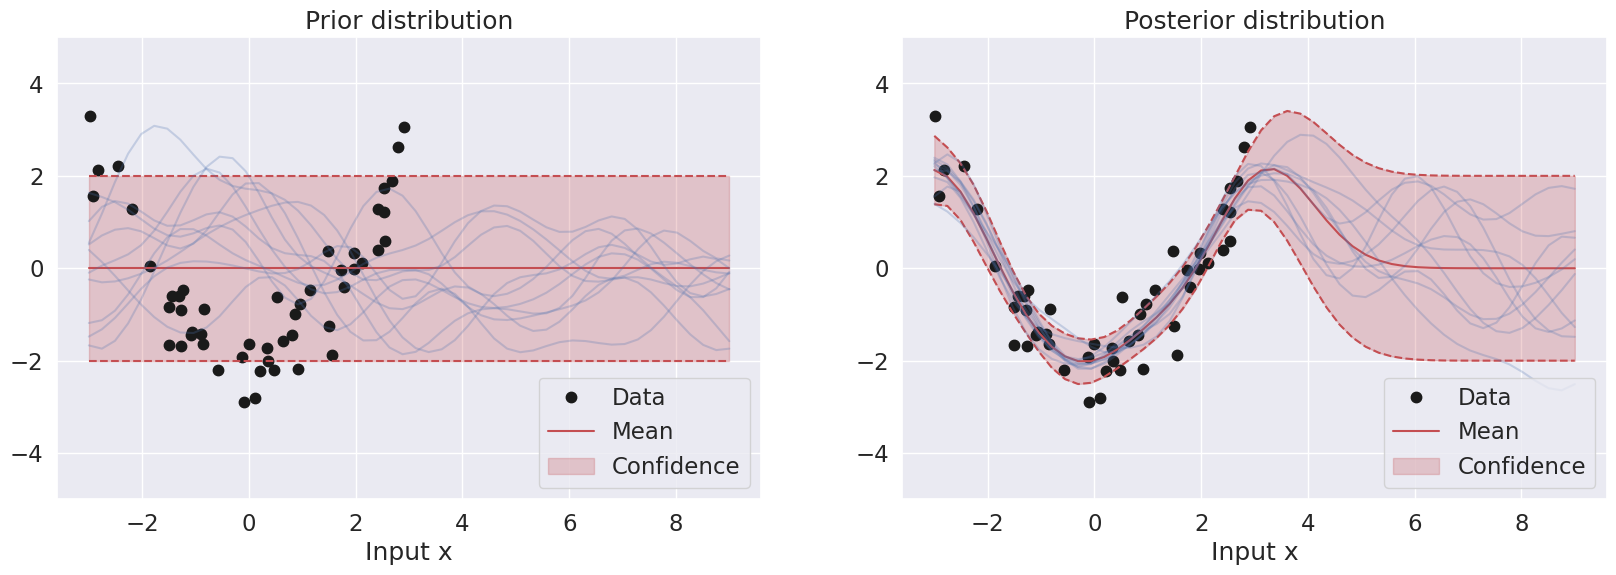

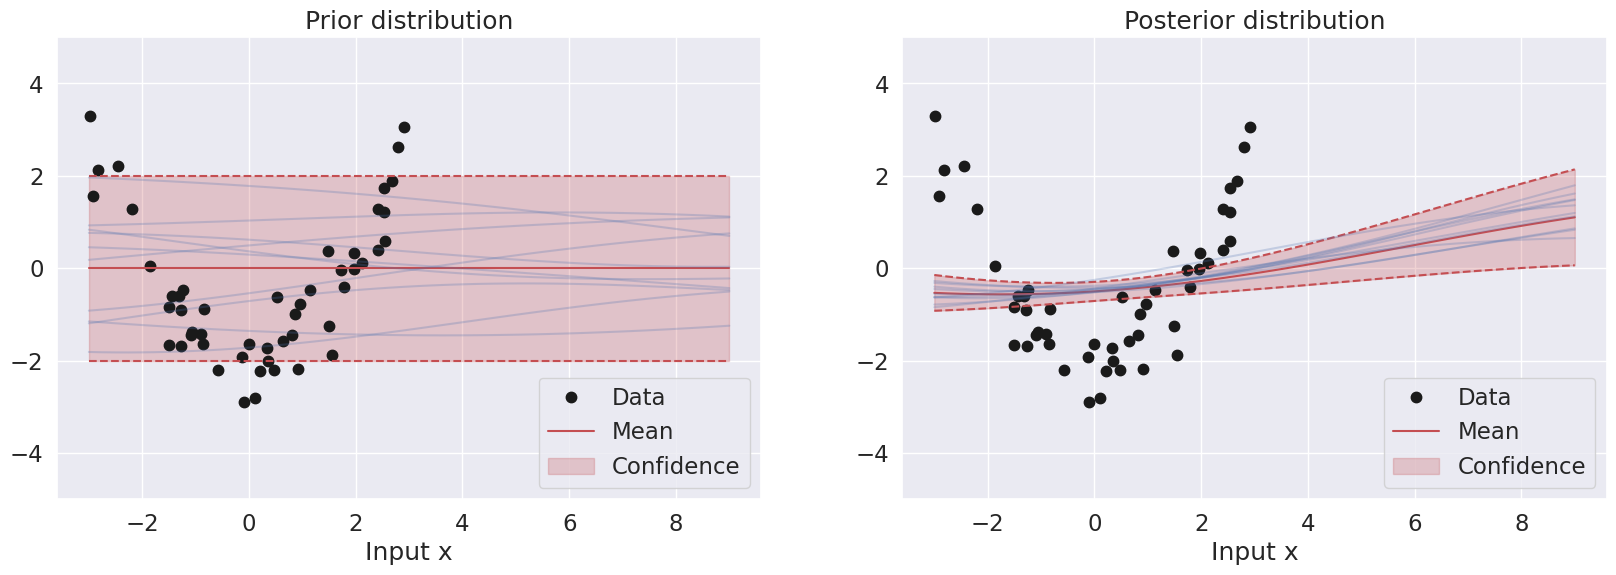

In [45]:
sigma2=0.5
alpha=1
scales = [0.1, 1., 10.]
def plot_data_with_uncertainty(mu_prior, Sigma_prior, mu_post, Sigma_post, scale):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plot_data()
    plot_with_uncertainty(Xp, mu_prior, Sigma_prior, title='Prior distribution', num_samples=10)
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plot_data()
    plot_with_uncertainty(Xp, mu_post, Sigma_post, title='Posterior distribution', num_samples=10)
    plt.legend(loc='lower right')

# YOUR CODE HERE
for scale in scales: 
    mu_post, Sigma_post = posterior(Xp, X, y, alpha, scale, sigma2)
    mu_prior, Sigma_prior = np.zeros((N, 1)), create_se_kernel(Xp, Xp, alpha, scale)
    plot_data_with_uncertainty(mu_prior, Sigma_prior, mu_post, Sigma_post, scale)
    plt.show()

How does varying the **scale** parameter change the plots for the prior and posterior distributions?

**1)** Increasing the scale increases the width of the confidence interval of the prior and posterior distributions.

**2)** Increasing the scale increases the smoothness of the functions sampled from the prior and posterior distributions.

**3)** Increasing the scale decreases the smoothness of the functions sampled from the prior and posterior distributions

**4)** Increasing the scale decreases the width of the confidence interval of the prior and posterior distributions.

Choose one answer and type it in the cell below.

In [ ]:
a_3d = 2 # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_3d in [1, 2, 3, 4]

#### Do not move or delete the below block. It is used for automatic grading.

**Task 3e**: Replicate the two figures above for the following three different values of the alpha parameter: $\alpha \in \left\lbrace 0.25, 1, 5 \right\rbrace$ and for $\sigma^2 = \frac{1}{2}$ and $\ell=1$. Answer the multiple choice question below.


/tmp/ipykernel_2644/181297125.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prematrix[i,j] = alpha* np.exp(-0.5*1/(scale**2)*(X1[i] - X2[j])**2)


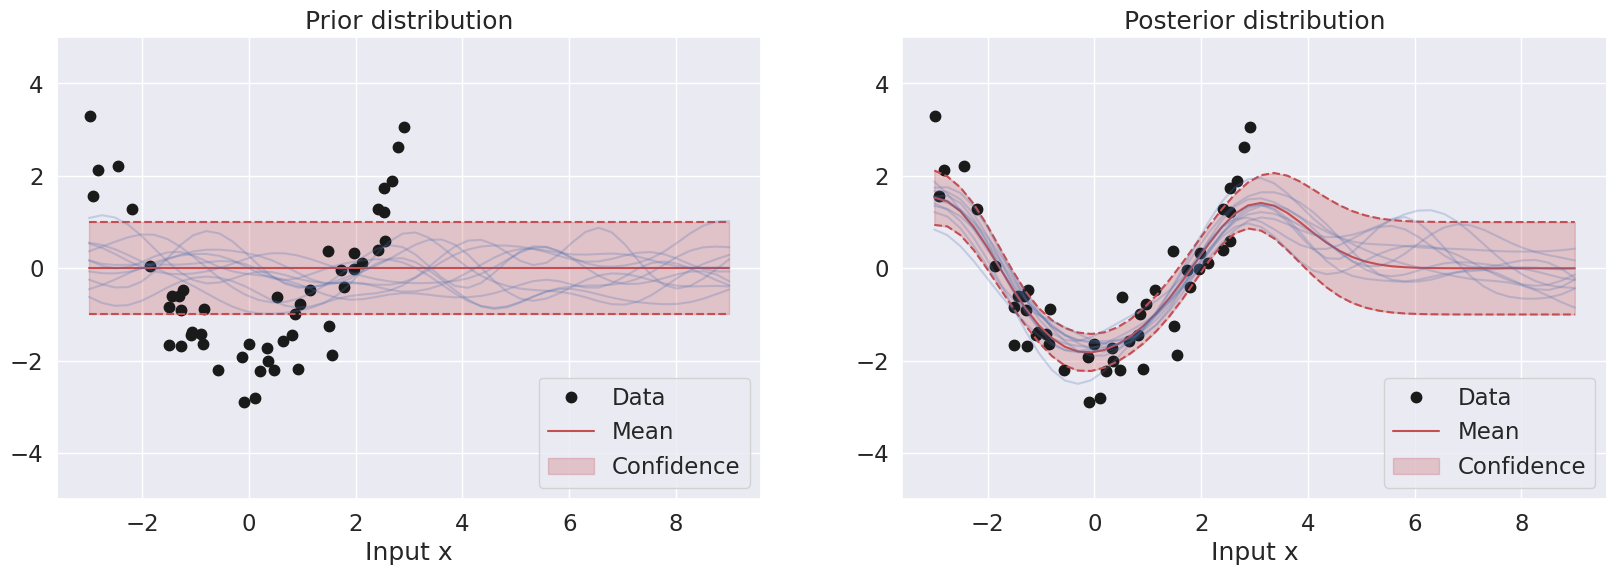

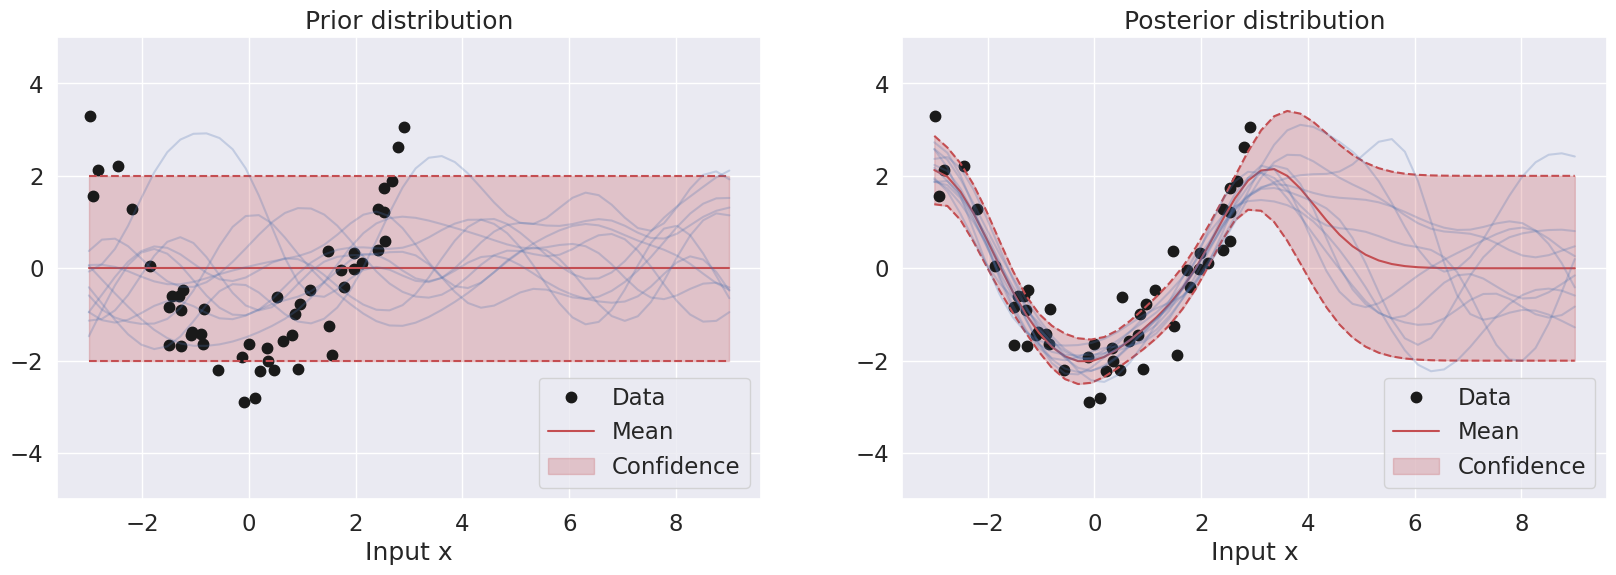

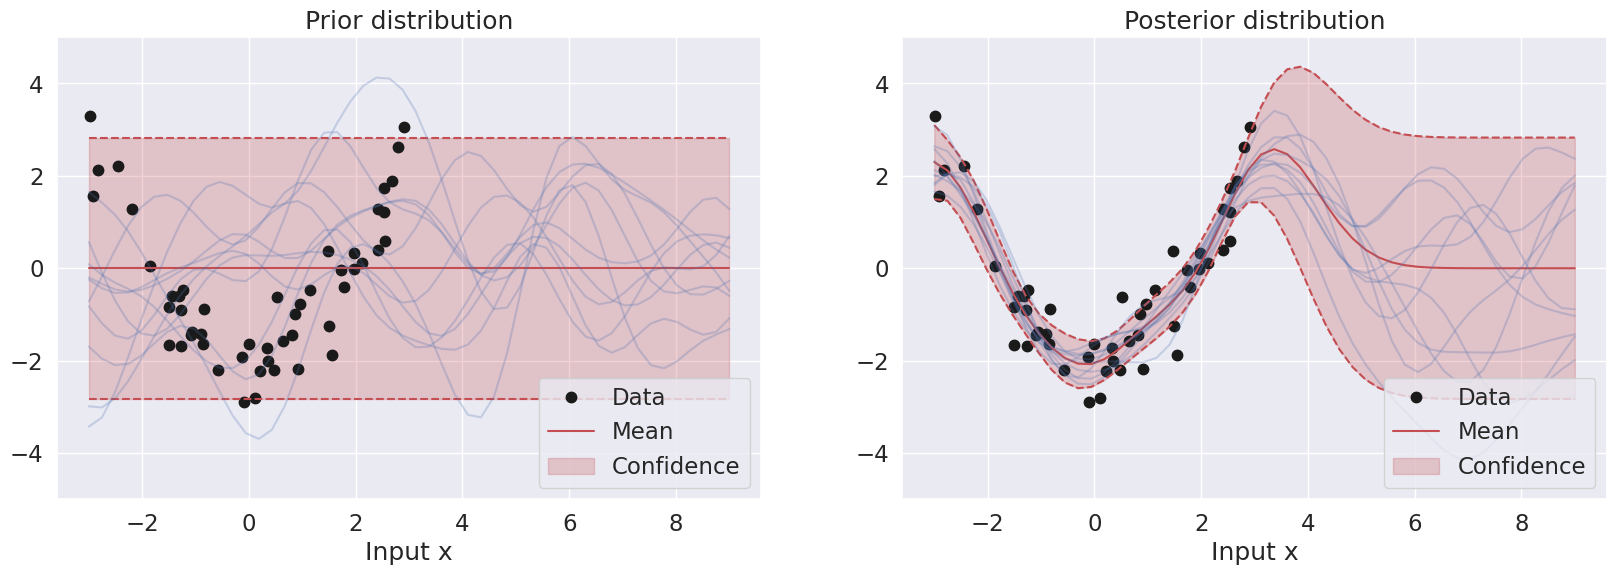

In [46]:
sigma2=0.5
scale=1
alphas = [0.25, 1., 2.]

# YOUR CODE HERE
for alpha in alphas: 
    mu_post, Sigma_post = posterior(Xp, X, y, alpha, scale, sigma2)
    mu_prior, Sigma_prior = np.zeros((N, 1)), create_se_kernel(Xp, Xp, alpha, scale)
    plot_data_with_uncertainty(mu_prior, Sigma_prior, mu_post, Sigma_post, alpha)
    plt.show()

How does varying the **alpha** parameter change the plots for the prior and posterior distributions?

**1)** Increasing alpha increases the width of the confidence interval of the prior and posterior distributions.

**2)** Increasing alpha increases the smoothness of the functions sampled from the prior and posterior distributions.

**3)** Increasing alpha decreases the smoothness of the functions sampled from the prior and posterior distributions

**4)** Increasing alpha decreases the width of the confidence interval of the prior and posterior distributions.

Choose one answer and type it in the cell below.

In [ ]:
a_3e = 1 # TASK: Replace None with your answer (1, 2, 3, 4)

In [ ]:
assert a_3e in [1, 2, 3, 4]

#### Do not move or delete the below block. It is used for automatic grading.

---

### Task 4: After answering all the questions, kindly set `automatic_grading=True` at the top of the notebook, use the validate option in the toolbar to validate the notebook and be sure that there are no errors.

---